In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Alameda County Jury Panels

The table `jury` is the data from the report


In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury
# There were 1,453 people in all the panels

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


### Do the distributions of the panels and eligle jurors look the same?

What type of figure can we use to look at this?

Let's show the figure in the next cell:
<details>
<summary>Solution</summary>
  jury.barh('Ethnicity')
</details>


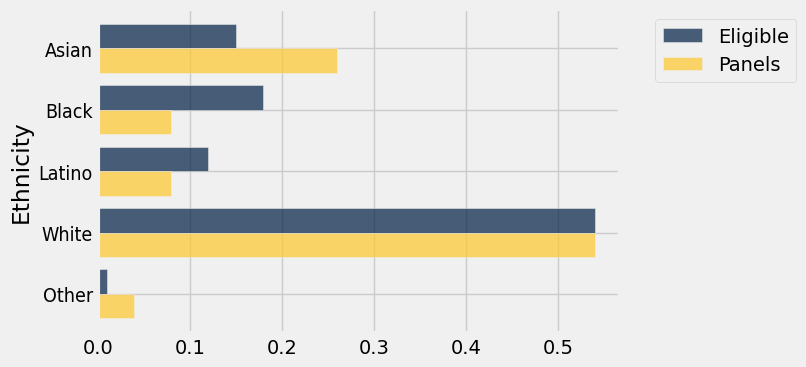

In [3]:
  jury.barh('Ethnicity')


#### From the visualziation do they look similar?

<details>
<summary>Solution</summary>
  Yes!
</details>


Is this variation that we are seeing, could it have happened due to chance?

We'll answer this once we have a new statistic

(back to slides)
### Differences between the distributions

Let's make a new Table where we add a new columns that represents the line by line difference


In [4]:
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [7]:
jury.column('Eligible') - jury.column('Panels')

array([-0.11,  0.1 ,  0.04,  0.  , -0.03])

<details>
<summary>Solution</summary>
  jury.with_columns('Categorical Difference', jury.column('Eligible') - jury.column('Panels'))
</details>


In [8]:
jury_with_diffs = jury.with_column("Difference", jury.column('Eligible') - jury.column('Panels'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,-0.11
Black,0.18,0.08,0.1
Latino,0.12,0.08,0.04
White,0.54,0.54,0
Other,0.01,0.04,-0.03


Compute the total difference across all groups

In [10]:
sum(jury_with_diffs.column('Difference'))

-2.7755575615628914e-17

<details>
<summary>Solution</summary>
  sum(jury_with_diffs.column('Categorical Difference'))
</details>

In [ ]:
jury_with_diffs.column('Categorical Difference')

In [12]:
#jury_with_diffs.column('Categorical Difference')
sum([-0.11 + 0.1 + 0.04 + 0 + -0.03])

6.938893903907228e-18

In [14]:
sum(jury_with_diffs.column('Eligible')), sum(jury_with_diffs.column('Panels'))

(1.0, 1.0)

In [15]:
jury.column('Eligible') - jury.column('Panels')

array([-0.11,  0.1 ,  0.04,  0.  , -0.03])

##### What is the total difference here?

<details>
<summary>Solution</summary>
  0. Because both eligible and panels are distributions. The positive and negative differences have the same size.
</details>

##### What should our statistic here be?

<details>
<summary>Solution</summary>
  It should be these magnittude, i.e. the sum of the positive differences == the sum of the negative differences
</details>

##### Let's now compute that statistic

<details>
<summary>Solution</summary>
  abs(-0.11 + -0.03)
</details>

In [18]:
abs(-0.11 + -.03), abs(.1 + 0.04)

(0.14, 0.14)

#### What is this statistic called?

In [22]:
# skip cell
sum(abs(jury_with_diffs.column("Difference"))) / 2




0.14000000000000001

In [23]:
def tvd(dist1, dist2):
    '''Given two distributions as arrays, compute the tvd'''
    return sum(abs(dist1 - dist2)) / 2


<details>
<summary>Solution</summary>
sum(abs(dist1 - dist2))/2</details>

In [25]:
tvd(jury.column('Eligible'), jury.column('Panels'))

0.14000000000000001

In [26]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [27]:
sample_proportions(1453, jury.column('Eligible'))

array([ 0.14384033,  0.18926359,  0.12250516,  0.53131452,  0.01307639])

In [28]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1453, jury.column('Eligible')), jury.column('Eligible'))

0.022642807983482449

(back to slides)
## Assesing the model
Could this difference of 0.14 happened by chance?

How can we answer this question?

<details>
<summary>Solution</summary>
  Simulating TVD. 
   Let's create random samples, make a empirical distribution from the random samples, and then compare
</details>


In [ ]:
# skip cell




#### Drawing a Random jury 

In [29]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [30]:
# Let's simulate a random draw of 1453 jurors from this distribution
# Why are we useing 1453?
random_draw = sample_proportions(1453, model)
random_draw

array([ 0.15072264,  0.18857536,  0.11768754,  0.53062629,  0.01238816])

In [31]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_random_draw = jury.with_column('Random Draw', random_draw)
jury_with_random_draw

Ethnicity,Eligible,Panels,Random Draw
Asian,0.15,0.26,0.150723
Black,0.18,0.08,0.188575
Latino,0.12,0.08,0.117688
White,0.54,0.54,0.530626
Other,0.01,0.04,0.0123882


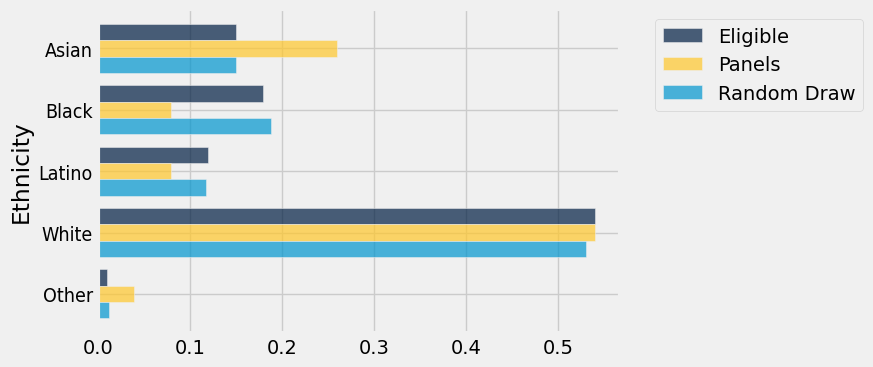

In [32]:
jury_with_random_draw.barh('Ethnicity')

##### How do we compute the tvd between the random draw and the model?

<details>
<summary>Solution</summary>
  Simulating TVD. 
   tvd(jury_with_random_draw.column('Random Draw'), jury_with_random_draw.column('Eligible'))
</details>


In [33]:
 tvd(jury_with_random_draw.column('Random Draw'), jury_with_random_draw.column('Eligible'))

0.01168616655196148

##### How does this compare with the tvd between the panels and the model, i.e. the observed sample? 

In [34]:
0.14

0.14

### Now let's simulate 10K random samples now

In [35]:
def simulated_tvd():
    return tvd(sample_proportions(1453, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    sample_distribution = sample_proportions(1453, model)
    new_tvd = tvd(sample_distribution, model)
    tvds = np.append(tvds, new_tvd)

Lets now plot the simulated `tvd`'s

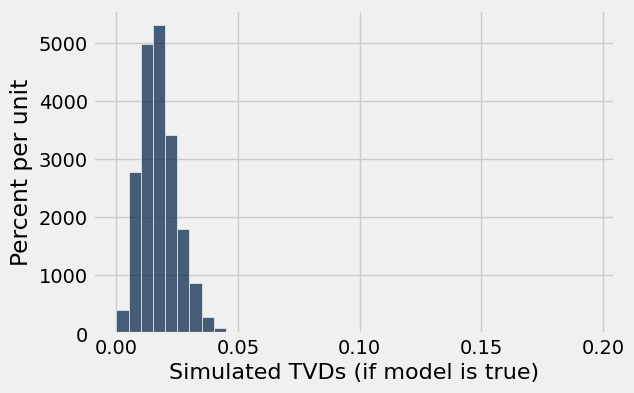

In [36]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .2, .005)

Table().with_column(title, tvds).hist(bins = bins)

##### What does this histogram show? 

<details>
<summary>Solution</summary>
  It shows the model's prediction.

</details>


##### Is this similar to what we actually saw in the data? 

<details>
<summary>Solution</summary>
  No. Let's compute that using `tvd()`

</details>

##### Therefore, is the observed data (the sample that happened in the world) consistent with the model?
<details>
<summary>Solution</summary>
  No. It is very unlikely, or almost unlikely for the tvd to be 0.14

</details>

(back to slides)